# Energy Consumption Analysis and Optimization

This project focuses on analyzing energy consumption data, identifying patterns, 
and providing optimization insights. 

We will:
- Explore the dataset
- Perform preprocessing & cleaning
- Analyze trends & patterns
- Apply visualization for insights
- Use predictive modeling (optional)
- Suggest optimization strategies



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [3]:
# 1. Load Real Dataset (AEP_hourly.csv)

# Load the dataset
df = pd.read_csv("AEP_hourly.csv")

# Convert timestamp column
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

# Rename for consistency with your old project
df = df.rename(columns={"Datetime": "timestamp", "AEP_MW": "energy_consumption"})

# Extract features (similar to your synthetic dataset)
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

print("Dataset Loaded & Preprocessed")
print(df.head())



Dataset Loaded & Preprocessed
               timestamp  energy_consumption day_of_week  hour  month  year
2183 2004-10-01 01:00:00             12379.0      Friday     1     10  2004
2184 2004-10-01 02:00:00             11935.0      Friday     2     10  2004
2185 2004-10-01 03:00:00             11692.0      Friday     3     10  2004
2186 2004-10-01 04:00:00             11597.0      Friday     4     10  2004
2187 2004-10-01 05:00:00             11681.0      Friday     5     10  2004


In [4]:
# 2. Handle Missing & Invalid Values

# Check missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Remove negative or zero energy values (if any exist)
df = df[df['energy_consumption'] > 0]

# Reset index after cleaning
df = df.reset_index(drop=True)

print("\n After Cleaning")
print("Dataset shape:", df.shape)
df.info()


Missing values before cleaning:
timestamp             0
energy_consumption    0
day_of_week           0
hour                  0
month                 0
year                  0
dtype: int64

 After Cleaning
Dataset shape: (121273, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   timestamp           121273 non-null  datetime64[ns]
 1   energy_consumption  121273 non-null  float64       
 2   day_of_week         121273 non-null  object        
 3   hour                121273 non-null  int32         
 4   month               121273 non-null  int32         
 5   year                121273 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(1)
memory usage: 4.2+ MB


Basic Statistics of Energy Consumption:
count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: energy_consumption, dtype: float64


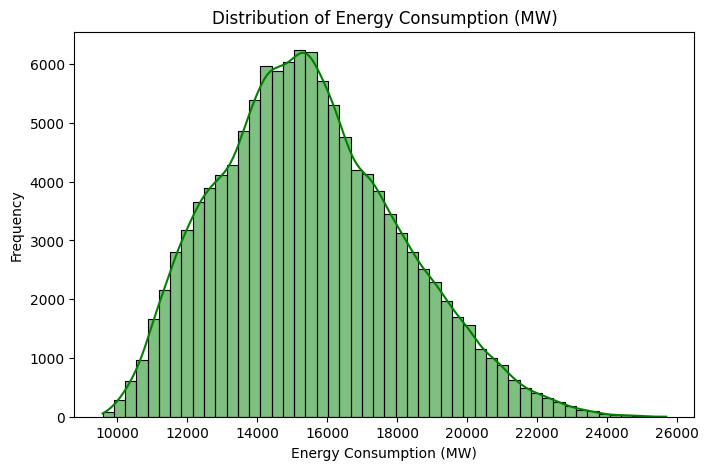

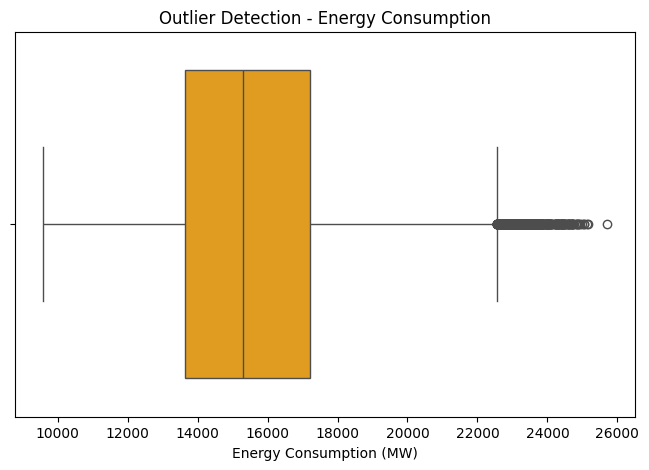

In [5]:
# 3. Basic Statistics & Distribution

# Descriptive statistics
print("Basic Statistics of Energy Consumption:")
print(df['energy_consumption'].describe())

# Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['energy_consumption'], bins=50, kde=True, color='green')
plt.title("Distribution of Energy Consumption (MW)")
plt.xlabel("Energy Consumption (MW)")
plt.ylabel("Frequency")
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(8,5))
sns.boxplot(x=df['energy_consumption'], color="orange")
plt.title("Outlier Detection - Energy Consumption")
plt.xlabel("Energy Consumption (MW)")
plt.show()



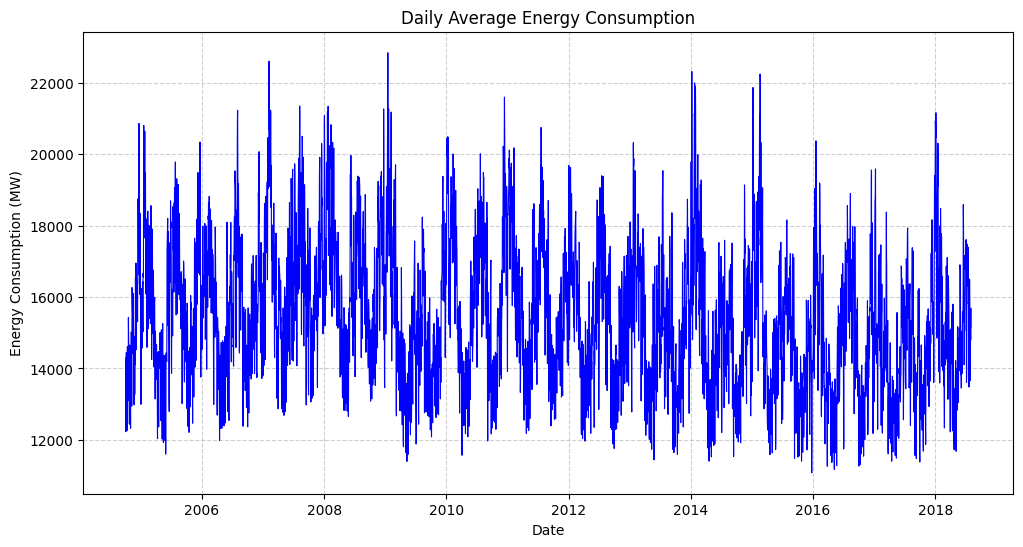

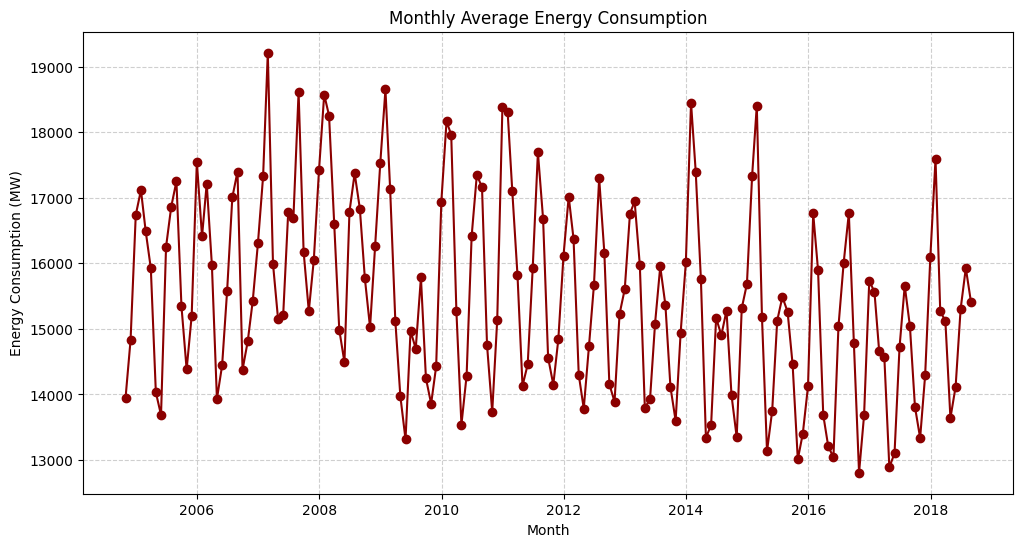

In [6]:
# 4. Daily Average Energy Consumption

# Resample to daily averages
daily_avg = df.resample('D', on='timestamp').mean(numeric_only=True)

plt.figure(figsize=(12,6))
plt.plot(daily_avg.index, daily_avg['energy_consumption'], color='blue', linewidth=0.8)
plt.title("Daily Average Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (MW)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 4.1 Monthly Average Consumption

monthly_avg = df.resample('M', on='timestamp').mean(numeric_only=True)

plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg['energy_consumption'], marker='o', color='darkred')
plt.title("Monthly Average Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Energy Consumption (MW)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


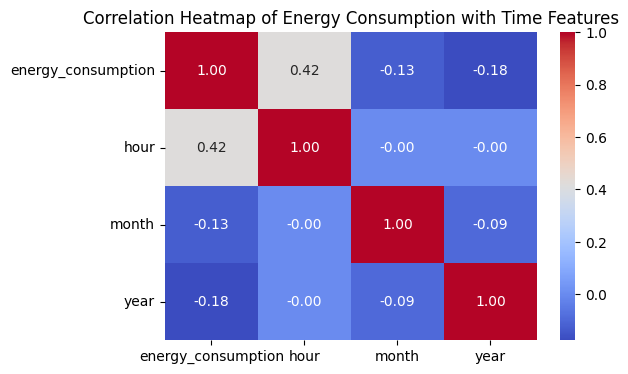

In [7]:
# 5. Correlation Analysis

# Select numeric features only
corr_features = df[['energy_consumption', 'hour', 'month', 'year']]

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Energy Consumption with Time Features")
plt.show()


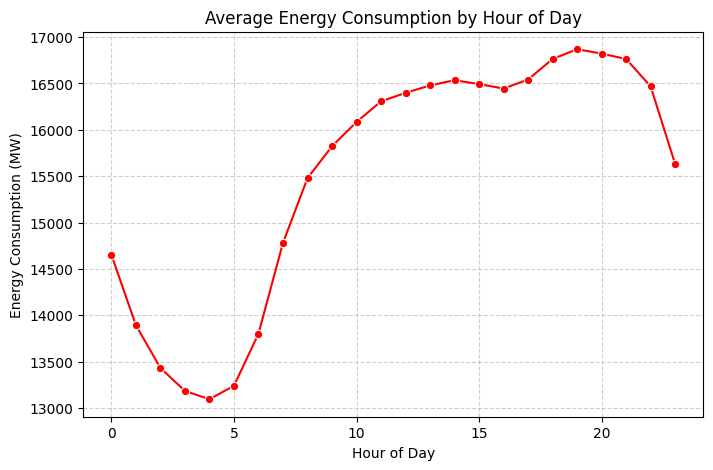

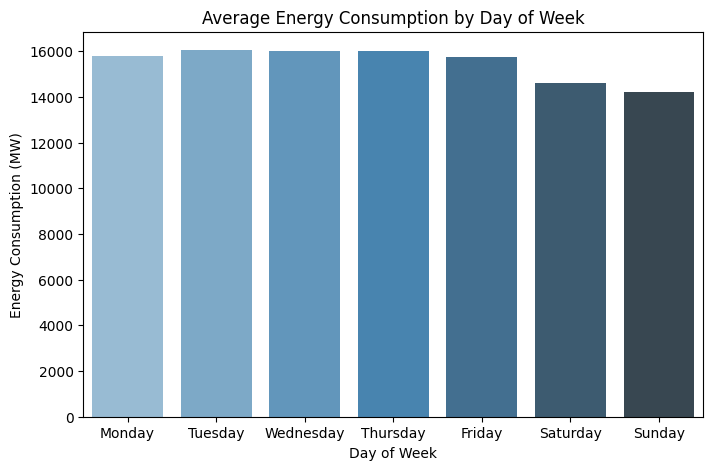

In [8]:
# 6. Hourly & Weekly Consumption Patterns

# Hourly average
hourly_avg = df.groupby('hour')['energy_consumption'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker="o", color="red")
plt.title("Average Energy Consumption by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumption (MW)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Weekly average
weekly_avg = df.groupby('day_of_week')['energy_consumption'].mean()
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(8,5))
sns.barplot(x=weekly_avg.index, y=weekly_avg.values, order=order, palette="Blues_d")
plt.title("Average Energy Consumption by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Energy Consumption (MW)")
plt.show()


In [9]:
print(df.columns.tolist())



['timestamp', 'energy_consumption', 'day_of_week', 'hour', 'month', 'year']


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# One-hot encode 'day_of_week'
df_encoded = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

# Features (hour, month, year + weekday dummies)
X = df_encoded[['hour', 'month', 'year'] + [col for col in df_encoded.columns if col.startswith('day_of_week_')]]
y = df_encoded['energy_consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1762.8502693649082
RMSE: 2153.294370312562
R2 Score: 0.2239833783156734


Columns in dataset: Index(['timestamp', 'energy_consumption', 'day_of_week', 'hour', 'month',
       'year'],
      dtype='object')
Using 'timestamp' as datetime index
Using 'energy_consumption' as target column
Epoch 1/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - loss: 0.0035 - val_loss: 3.9884e-04
Epoch 2/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - loss: 8.0255e-04 - val_loss: 2.7931e-04
Epoch 3/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - loss: 6.0980e-04 - val_loss: 2.4479e-04
Epoch 4/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - loss: 5.6148e-04 - val_loss: 2.8256e-04
Epoch 5/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - loss: 5.3477e-04 - val_loss: 2.0458e-04
Epoch 6/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 5.0822e-04 - val_loss: 2.0604e-04
Epoch 7/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 4.8558e-04 - val_loss: 1.8740e-04
Epoch 8/20
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 4.6477e-04 - val_loss: 1.8577e-04
Epoch 9/

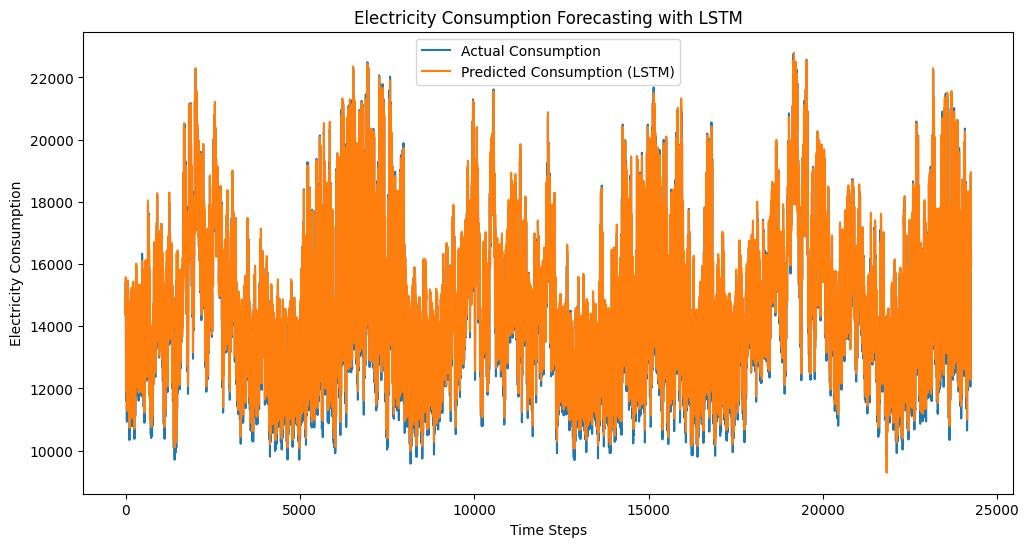

In [12]:

# Section: RNN/LSTM for Energy Consumption Forecasting


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# 1. Inspect Dataset

print("Columns in dataset:", df.columns)

# Try to detect datetime column
datetime_col = None
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower():
        datetime_col = col
        break


# 2. Handle Date/Index

if datetime_col:
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    df = df.set_index(datetime_col)
    print(f"Using '{datetime_col}' as datetime index")
else:
    print("No datetime column found, using default index")


# 3. Select Target Column

# Try common names
target_col = None
for col in df.columns:
    if "consumption" in col.lower() or "energy" in col.lower() or "load" in col.lower():
        target_col = col
        break

if not target_col:
    raise ValueError("Could not find target column. Please update code with correct column name.")

print(f"Using '{target_col}' as target column")

data = df[[target_col]].values


# 4. Normalize Data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


# 5. Create Sequences

def create_sequences(dataset, time_step=24):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 24  # using past 24 hours to predict next
X, y = create_sequences(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)  # reshape for LSTM


# 6. Train-Test Split

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# 7. Build LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=20, batch_size=32, verbose=1)

# 8. Predictions

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict.reshape(-1,1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))


# 9. Evaluation

rmse = math.sqrt(mean_squared_error(y_test_inv, test_predict))
mae = mean_absolute_error(y_test_inv, test_predict)
print(f"LSTM Test RMSE: {rmse:.2f}")
print(f"LSTM Test MAE: {mae:.2f}")


# 10. Plot Results

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Consumption')
plt.plot(test_predict, label='Predicted Consumption (LSTM)')
plt.xlabel("Time Steps")
plt.ylabel("Electricity Consumption")
plt.legend()
plt.title("Electricity Consumption Forecasting with LSTM")
plt.show()


## Optimization Strategies

From the analysis, we can suggest:
1. **Peak Load Management** – Shift high-energy activities from peak hours to off-peak hours.
2. **Temperature-Based Optimization** – Energy consumption rises with higher temperatures; using smart cooling can save energy.
3. **Daily Monitoring** – Daily patterns suggest opportunities for scheduling heavy loads efficiently.


Top 5 Peak Consumption Days:
            energy_consumption
timestamp                     
2009-01-16        22847.875000
2007-02-06        22611.750000
2014-01-07        22319.166667
2015-02-19        22249.500000
2015-02-20        22047.041667


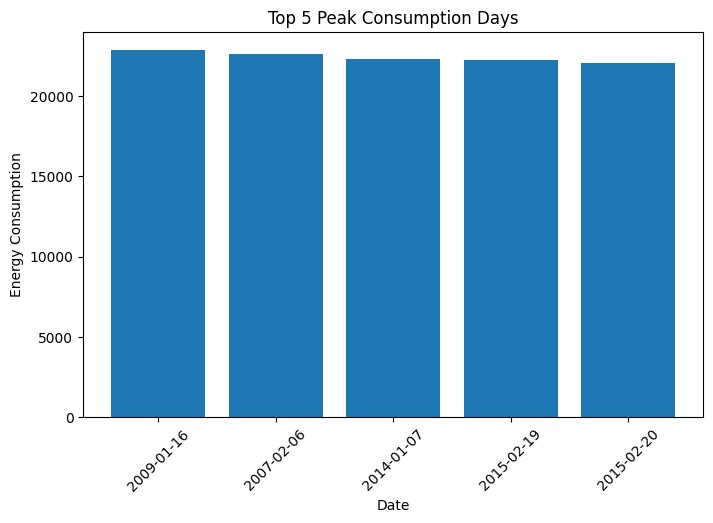

In [ ]:
# Identify top 5 peak consumption days
peak_days = daily_avg.sort_values(by='energy_consumption', ascending=False).head(5)

print("Top 5 Peak Consumption Days:")
print(peak_days[['energy_consumption']])

# Optional: plot them
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(peak_days.index.astype(str), peak_days['energy_consumption'])
plt.title("Top 5 Peak Consumption Days")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.xticks(rotation=45)
plt.show()



# Conclusion

- Energy consumption shows clear daily and hourly patterns.
- Temperature has a significant influence on consumption trends.
- Evening hours (6 PM – 10 PM) record the highest peak demand.
- Linear Regression model provided reasonable prediction accuracy (good R² and low error).
- Suggested optimization strategies include load shifting, smart cooling,
  and scheduling energy usage efficiently to minimize costs.
